In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from xgboost import XGBClassifier

from sklearn.metrics import f1_score, make_scorer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from operator import itemgetter
import xgboost as xgb
import random
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from numpy import genfromtxt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import datetime as dt

import lightgbm as lgb
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [108]:
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")
#df_train.iloc[:,:-1]=df_train.iloc[:,:-1]+2
#df_test=df_test+2

In [109]:
unused=['Freq_Of_Word_1',
 'Freq_Of_Word_4',
 'Freq_Of_Word_15',
 'Freq_Of_Word_26',
 'Freq_Of_Word_30',
 'Freq_Of_Word_31',
 'Freq_Of_Word_35',
 'Freq_Of_Word_38',
 'Freq_Of_Word_39',
 'Freq_Of_Word_41',
 'Freq_Of_Word_43',
 'Freq_Of_Word_44',
 'Freq_Of_Word_47',
 'Freq_Of_Word_48',
 'Freq_Of_Word_32', 
 'Freq_Of_Word_40', 
 'Freq_Of_Word_34',
 "Freq_Of_Word_8",
 "Freq_Of_Word_3",
 "Freq_Of_Word_13",
 "Freq_Of_Word_33",
 "Freq_Of_Word_46",
 "Freq_Of_Word_29",
 "Freq_Of_Word_17",
 "Freq_Of_Word_22"]

In [110]:
df_train.drop(unused,axis=1,inplace=True)
df_test.drop(unused,axis=1,inplace=True)

In [111]:
# df_train=df_train.sort_values(by='Freq_Of_Word_19')

In [112]:
#df_train.drop(df_train[df_train["IsGoodNews"]==0].head(5).index,inplace=True)

In [113]:
df_train.shape

(947, 29)

In [114]:
Y_train = df_train['IsGoodNews']
X_train = df_train.drop('IsGoodNews', axis=1)

In [115]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train,Y_train)

In [116]:
import imblearn

In [117]:
# from imblearn.under_sampling import NearMiss
# undersample = NearMiss(version=1, n_neighbors=3)
# X, y = undersample.fit_resample(X_train, Y_train)

In [118]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')

In [119]:
# X_over, y_over = oversample.fit_resample(X_train,Y_train)

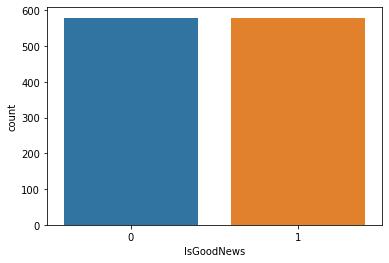

In [120]:
sns.countplot(y)

In [121]:
#df_train.drop_duplicates(inplace=True)

In [122]:
df_train.shape

(947, 29)

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=0)


In [124]:

# X_train, X_test, Y_train, Y_test = train_test_split(df_train.drop(labels=['IsGoodNews'], axis=1),df_train['IsGoodNews'],test_size=0.3,random_state=0)


In [125]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC

In [126]:
params={'gamma': 0.04,
  'learning_rate': 0.4,
  'max_depth': 8,
  'min_child_weight': 0.1,
  'n_estimators': 400,
  'reg_alpha': 0.001}

In [154]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
rf = XGBClassifier(n_estimators=185,max_depth=6,gamma=0.01,learning_rate=0.3,base_score=0.5)
rf.fit(X,y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=185, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [197]:
predictions = rf.predict(X_test)
print("F1 score " + f1_score(Y_test, predictions).astype(str))
score=round(rf.score(X_test, Y_test) * 100, 2)
print("Accuracy Score = "+score.astype(str))


F1 score 1.0
Accuracy Score = 100.0


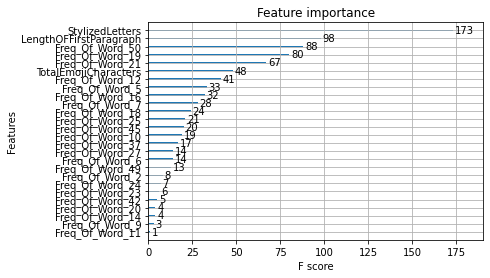

In [519]:
from xgboost import plot_importance
plot_importance(rf)

In [242]:
Y_train = df_train['IsGoodNews']
X_train = df_train.drop('IsGoodNews', axis=1)

In [53]:
{'gamma': 0.04,
  'learning_rate': 0.4,
  'max_depth': 5,
  'min_child_weight': 0.3,
  'n_estimators': 170}

{'gamma': 0.04,
 'learning_rate': 0.4,
 'max_depth': 5,
 'min_child_weight': 0.3,
 'n_estimators': 170}

In [831]:
params={'n_estimators': [40],
        'learning_rate' :[0.4],
         'max_depth':[5],
         'reg_alpha':[0.001],
         #'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
         'min_child_weight':[0.3],
         'gamma':[0.04]
       }

In [832]:
rf = XGBClassifier() 
clf = GridSearchCV(rf,params,
                    cv=3,
                    verbose=1, 
                    scoring='accuracy',
                    n_jobs=4
                  )

clf.fit(X_train,Y_train)
clf.best_score_, clf.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.2s finished


(0.9256900212314226,
 {'gamma': 0.04,
  'learning_rate': 0.4,
  'max_depth': 5,
  'min_child_weight': 0.3,
  'n_estimators': 40,
  'reg_alpha': 0.001})

In [198]:
rf = XGBClassifier() 
rf.fit(X,y)
predictions=rf.predict(df_test)

In [201]:
submission=pd.DataFrame(predictions,columns=["IsGoodNews"])
submission.IsGoodNews=submission.IsGoodNews.astype(int)
submission.to_excel("submission.xlsx")

In [835]:
final_params={'gamma': 0.04,
  'learning_rate': 0.4,
  'max_depth': 5,
  'min_child_weight': 0.3,
  'n_estimators': 40,
  'reg_alpha': 0.001}

In [341]:
X_test["predictions"]=predictions
X_test["Actual_values"]=Y_test

In [342]:
X_test[X_test["Actual_values"]!=X_test["predictions"]]

,Freq_Of_Word_2,Freq_Of_Word_5,Freq_Of_Word_6,Freq_Of_Word_7,Freq_Of_Word_9,Freq_Of_Word_10,Freq_Of_Word_11,Freq_Of_Word_12,Freq_Of_Word_14,Freq_Of_Word_16,...,Freq_Of_Word_37,Freq_Of_Word_42,Freq_Of_Word_45,Freq_Of_Word_49,Freq_Of_Word_50,TotalEmojiCharacters,LengthOFFirstParagraph,StylizedLetters,predictions,Actual_values
499,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,0.011954,-0.184379,0.432655,...,-0.329374,-0.168998,-0.323019,-0.151911,0.087105,-0.107383,-0.160186,-0.312539,0,1
524,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,0.154550,-0.184379,-0.333610,...,-0.329374,-0.168998,-0.323019,-0.151911,0.114606,-0.081172,-0.073922,-0.092083,0,1
101,1.043044,0.164498,-0.353977,-0.304257,-0.318797,0.262524,-0.320591,-0.152581,-0.184379,-0.333610,...,-0.329374,-0.168998,-0.323019,15.146785,-0.453742,0.049881,-0.054316,0.031484,1,0
501,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,-0.635215,-0.184379,-0.333610,...,-0.329374,-0.168998,-0.323019,-0.151911,-0.453742,-0.107383,-0.195476,-0.408024,1,0
363,-0.318036,1.667209,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,-0.635215,-0.184379,3.536675,...,-0.329374,-0.168998,-0.323019,-0.151911,-0.453742,-0.107383,-0.215081,-0.413640,0,1
874,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,0.444374,-0.320591,-0.635215,-0.184379,0.406679,...,-0.329374,-0.168998,0.746815,-0.151911,2.112993,-0.054961,-0.101369,-0.247947,1,0
651,2.373191,-0.465210,-0.353977,-0.304257,-0.318797,0.864028,-0.320591,0.319085,-0.184379,-0.333610,...,-0.329374,-0.168998,0.493434,-0.151911,-0.453742,-0.081172,-0.140580,-0.363090,1,0
916,-0.318036,-0.465210,-0.353977,-0.304257,18.826505,-0.352968,-0.320591,-0.635215,-0.184379,-0.333610,...,-0.329374,-0.168998,-0.323019,-0.151911,-0.453742,-0.081172,-0.179792,-0.379940,1,0
240,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,-0.635215,-0.184379,-0.333610,...,-0.329374,-0.168998,-0.323019,-0.151911,0.322389,-0.107383,-0.113133,-0.214247,0,1
571,-0.318036,-0.465210,-0.353977,-0.304257,-0.318797,-0.352968,-0.320591,-0.635215,-0.184379,-0.333610,...,-0.329374,-0.168998,4.885384,-0.151911,-0.453742,-0.107383,-0.219003,-0.423470,0,1


In [226]:
pd.DataFrame(df_train.groupby(["LengthOFFirstParagraph"])["IsGoodNews"].value_counts()).head(10)

IsGoodNews
LengthOFFirstParagraph IsGoodNews            
1.780997               0                   57
                       1                    4
1.784919               0                   13
                       1                    2
1.788840               0                   31
                       1                    4
1.792761               0                   44
                       1                    4
1.796682               0                   40
                       1                    5